### Hackathon

In [360]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix




In [361]:
df = pd.read_csv('./data/large_train_sample.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [362]:
len(df.columns)

14

In [363]:
df.shape

(32561, 14)

In [364]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [365]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [366]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [367]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [368]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [369]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [370]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [371]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [372]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [373]:
df['wage'].value_counts()

 <=50K    24720
 >50K      7841
Name: wage, dtype: int64

In [374]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Cleaning and EDA

In [395]:
#Binarize target column, set above $50,000 as the positive class
df["wage"] = df["wage"].map(lambda x: 1 if x==" >50K" else 0)

#binarize sex 1 if male
df["sex"] = df["sex"].map(lambda x: 1 if x==" Male" else 0)


In [376]:
df['sex'].value_counts()

1    21790
0    10771
Name: sex, dtype: int64

In [377]:
df['wage'].value_counts()

0    24720
1     7841
Name: wage, dtype: int64

In [378]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [379]:
#dummifying the categorical columns
df_dum = pd.get_dummies(data = df,columns=['workclass', 'education', 'marital-status', 'occupation','relationship','native-country'], drop_first = True)

In [380]:
#looking at the top correlated features
df_dum.corr()['wage'].sort_values(ascending=False)

wage                                  1.000000
marital-status_ Married-civ-spouse    0.444696
education-num                         0.335154
age                                   0.234037
hours-per-week                        0.229689
                                        ...   
relationship_ Unmarried              -0.142857
occupation_ Other-service            -0.156348
relationship_ Not-in-family          -0.188497
relationship_ Own-child              -0.228532
marital-status_ Never-married        -0.318440
Name: wage, Length: 97, dtype: float64

<AxesSubplot:>

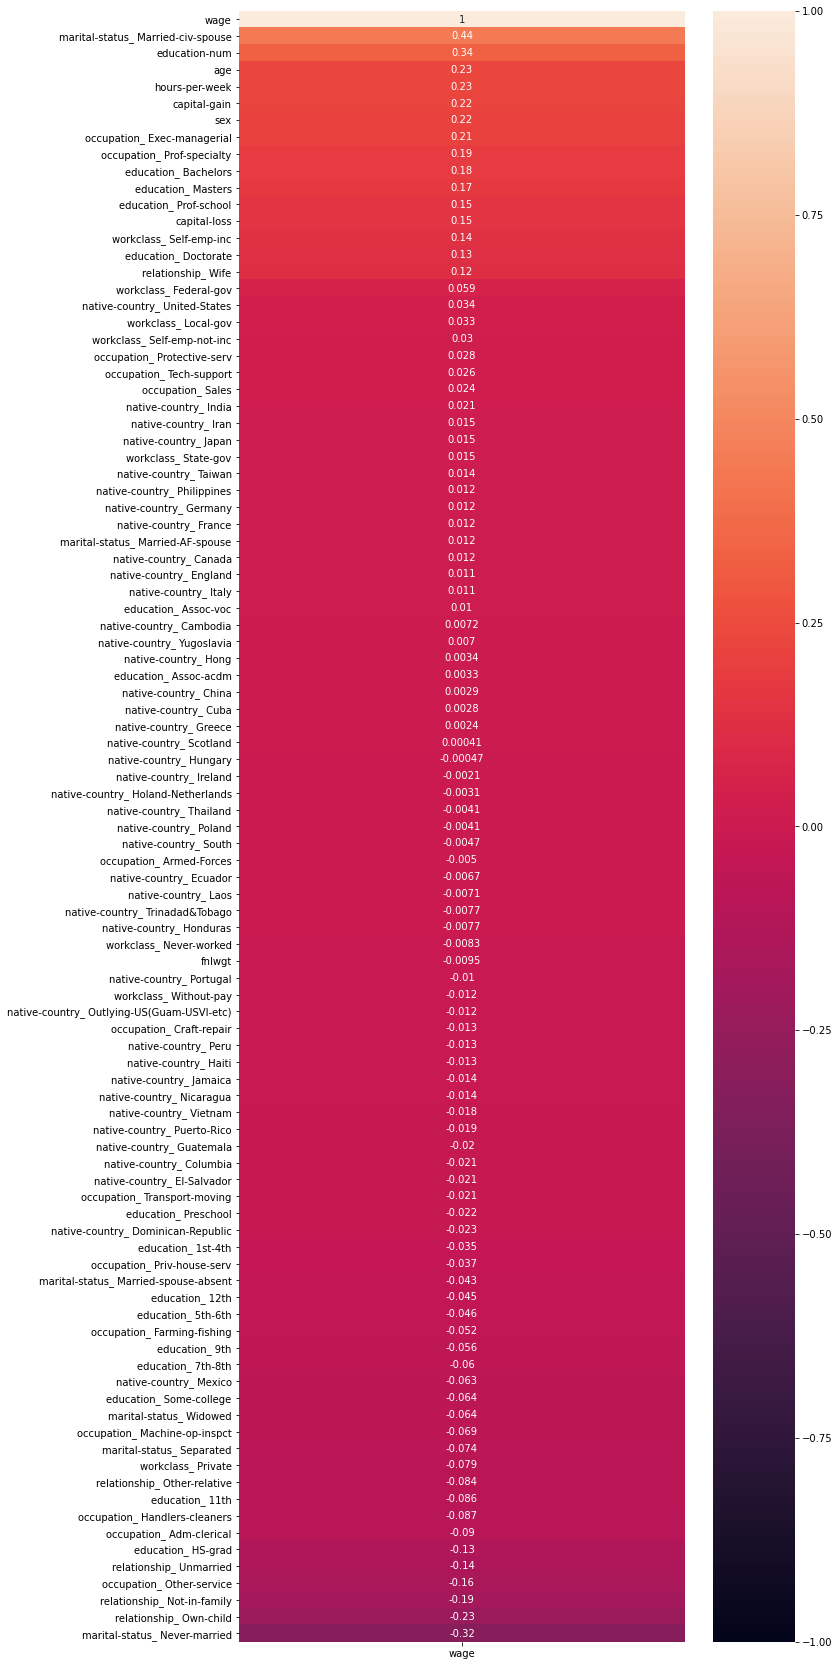

In [385]:
plt.figure(figsize= (10,30))
sns.heatmap(df_dum.corr()[['wage']].sort_values(by = 'wage',ascending=False), vmin = -1, vmax = 1, annot = True)

In [386]:
#saving a copy of the dataframe without dropped features to use later
df_all_features = df_dum

In [387]:
#drop columns that have low correlation with our wage variable
corrdf = df_dum.corr()
testcorr = corrdf["wage"]
testcorr.map(lambda x: abs(x))
testcorr = testcorr.sort_values(ascending=False)
loc_keeps = []
for i in range(21):
    loc_keeps.append(testcorr.index[i]) 
df_dum[loc_keeps]
df_dum = df_dum[loc_keeps]

In [388]:
loc_keeps

['wage',
 'marital-status_ Married-civ-spouse',
 'education-num',
 'age',
 'hours-per-week',
 'capital-gain',
 'sex',
 'occupation_ Exec-managerial',
 'occupation_ Prof-specialty',
 'education_ Bachelors',
 'education_ Masters',
 'education_ Prof-school',
 'capital-loss',
 'workclass_ Self-emp-inc',
 'education_ Doctorate',
 'relationship_ Wife',
 'workclass_ Federal-gov',
 'native-country_ United-States',
 'workclass_ Local-gov',
 'workclass_ Self-emp-not-inc',
 'occupation_ Protective-serv']

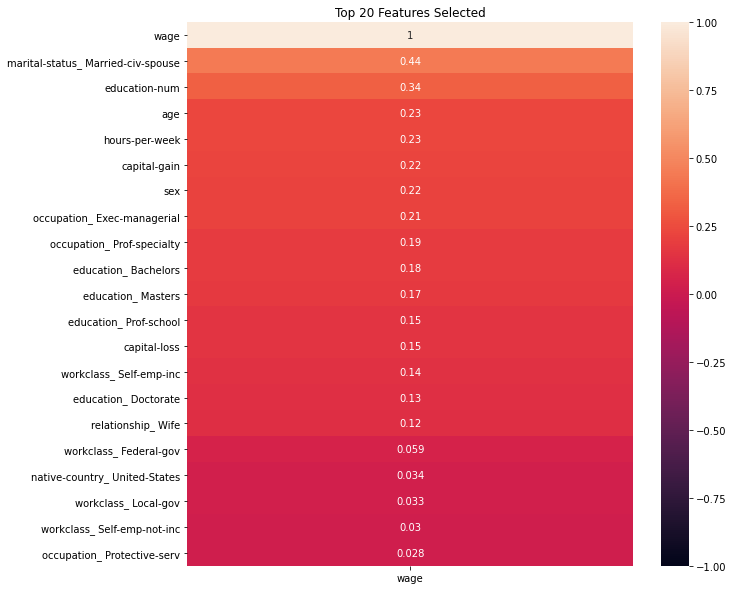

In [394]:
plt.figure(figsize= (10,10))
sns.heatmap(df_dum.corr()[['wage']].sort_values(by = 'wage',ascending=False), vmin = -1, vmax = 1, annot = True)
plt.title('Top 20 Features Selected')
plt.savefig('./images/heatmap.png')

## Modeling

In [324]:
#Baseline score that we would like our models to beat
1 - df["wage"].mean()

0.7591904425539756

### Logistic Regressions 

In [170]:
#Logistic regression with numeric features

features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
X = df[features]
y = df['wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify=y)

pipe = Pipeline([
    ('ss',  StandardScaler()),
    ('lr',  LogisticRegression()),
])
pipe_params = {
    "lr__penalty": ["l2"],
    "lr__C": np.logspace(0, 1, 10),
    "lr__max_iter": [50, 100, 150]
}
grid = GridSearchCV(estimator = pipe,
                   param_grid = pipe_params,
                   cv = 5)

grid.fit(X_train,y_train)
# print(f"Best score:\t{grid.best_score_}")
print(f"Train score:\t{grid.score(X_train, y_train)}")
print(f"Test score:\t{grid.score(X_test, y_test)}")
for param, val in grid.best_params_.items():
    print(f"{param[6:]}:  {val}")

Train score:	0.8146114864864865
Test score:	0.8185168125287886
:  1.0
x_iter:  50
nalty:  l2


Logistic Regresion with the top 20 most highly correlated features

In [171]:
%%time

X = df_dum.drop(columns="wage")
y = df_dum['wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

pipe_lg = Pipeline([
    ("ss", StandardScaler()),
    ("lg", LogisticRegression())
])
params_lg = {
    "lg__penalty": ["l2"],
    "lg__C": np.logspace(0, 1, 10),
    "lg__max_iter": [50, 100, 150]}

    

gs_lg = GridSearchCV(
    pipe_lg, 
    param_grid=params_lg, 
    cv=5)
    
gs_lg.fit(X_train, y_train)
    
print(f"Best score:\t{gs_lg.best_score_}")
print(f"Train score:\t{gs_lg.score(X_train, y_train)}")
print(f"Test score:\t{gs_lg.score(X_test, y_test)}")
for param, val in gs_lg.best_params_.items():
    print(f"{param[6:]}:  {val}")

Best score:	0.8464371092553895
Train score:	0.8475890663390664
Test score:	0.8513741747274681
:  1.0
x_iter:  50
nalty:  l2
CPU times: user 28.7 s, sys: 3.18 s, total: 31.9 s
Wall time: 42.7 s


### Support Vector Machines

In [172]:
df_dum.columns

Index(['wage', 'marital-status_ Married-civ-spouse', 'education-num', 'age',
       'hours-per-week', 'capital-gain', 'sex', 'occupation_ Exec-managerial',
       'occupation_ Prof-specialty', 'education_ Bachelors',
       'education_ Masters', 'education_ Prof-school', 'capital-loss',
       'workclass_ Self-emp-inc', 'education_ Doctorate', 'relationship_ Wife',
       'workclass_ Federal-gov', 'native-country_ United-States',
       'workclass_ Local-gov', 'workclass_ Self-emp-not-inc',
       'occupation_ Protective-serv'],
      dtype='object')

### Random Forest

In [180]:
#Random Forest

X = df_dum.drop(columns="wage")
y = df_dum['wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify=y)
pipe_rf = Pipeline([
    ("ss", StandardScaler()),
    ("rf", RandomForestRegressor())
])
params_rf = {
    "rf__n_estimators": [50, 100],
    "rf__max_features": [None, 'auto', 'log2'],
    "rf__max_depth": [15, 20]
}


gs_rf = GridSearchCV(
    pipe_rf, 
    param_grid=params_rf, 
    cv=5,
    n_jobs=4,
    verbose =1
)
gs_rf.fit(X_train, y_train)

print(f"Best score:\t{gs_rf.best_score_}")
print(f"Train score:\t{gs_rf.score(X_train, y_train)}")
print(f"Test score:\t{gs_rf.score(X_test, y_test)}")
for param, val in gs_rf.best_params_.items():
    print(f"{param[6:]}:  {val}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  2.6min finished


Best score:	0.47474994803018084
Train score:	0.6007701509132364
Test score:	0.4930056778886832
x_depth:  15
x_features:  log2
estimators:  100


### Ada boost classifer

In [188]:
X = df_dum.drop(columns="wage")
y = df_dum['wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify=y)
pipe_ada = Pipeline([
    ('ada', AdaBoostClassifier())
])
ada_params = {
    'ada__learning_rate' : [1],
    'ada__n_estimators' : [50,100,150,200]
}
gs_ada = GridSearchCV(pipe_ada, param_grid=ada_params, cv=5, verbose=1,n_jobs = 4)
gs_ada.fit(X_train, y_train)

print(f"Best score:\t{gs_ada.best_score_}")
print(f"Train score:\t{gs_ada.score(X_train, y_train)}")
print(f"Test score:\t{gs_ada.score(X_test, y_test)}")
for param, val in gs_ada.best_params_.items():
    print(f"{param[6:]}:  {val}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   25.7s finished


Best score:	0.8637513619753794
Train score:	0.8652871621621622
Test score:	0.869031168432366
earning_rate:  1
_estimators:  200


### XGBClassifier

In [313]:
X = df_dum.drop(columns="wage")
y = df_dum['wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42, stratify=y)


xg = XGBClassifier()
xg_params = {
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'max_depth' : [None, 2, 3]
}
gs_xg = GridSearchCV(xg, param_grid=xg_params, cv=5, verbose=1, n_jobs = 4)

gs_xg.fit(X_train, y_train)

print(f"Best score:\t{gs_xg.best_score_}")
print(f"Train score:\t{gs_xg.score(X_train, y_train)}")
print(f"Test score:\t{gs_xg.score(X_test, y_test)}")
for param, val in gs_xg.best_params_.items():
    print(f"{param[6:]}:  {val}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:  2.7min finished


Best score:	0.8688572524521083
Train score:	0.8788390663390664
Test score:	0.8724090280976509
ng_rate:  0.1
pth:  None


Specificity: 94.7
Sensitivity: 63.71
Misclassification Rate: 12.76


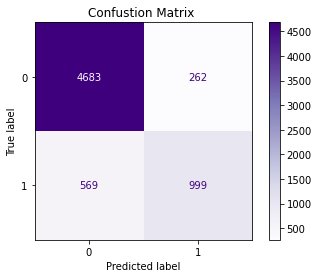

In [315]:
#visualizing the errors of our best model
tn, fp, fn, tp = confusion_matrix(y_test, gs_xg.predict(X_test)).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
misclassified = (fp+fn)/(tn+tp+fn+fp)
plot_confusion_matrix(gs_xg, X_test, y_test, cmap='Purples', values_format='d')
plt.title(f"Confustion Matrix ");
print(f'Specificity: {round((specificity *100),2)}')
print(f'Sensitivity: {round((sensitivity *100),2)}')
print(f"Misclassification Rate: {round(misclassified * 100,2)}")
plt.savefig('./images/confusion_matrix.png')

In [314]:
len(X_train.columns)

20

## Test Data processing, predictions, and submission creation

In [397]:
#read in and process the test data
#Clean the testing data frame as we did for the training dataframe above
test_df = pd.read_csv('./data/test_data.csv')

#binarize sex 1 if male
test_df["sex"] = test_df["sex"].map(lambda x: 1 if x==" Male" else 0)
test_df = pd.get_dummies(data = test_df,columns=['workclass', 'education', 'marital-status', 'occupation','relationship','native-country'], drop_first = True)
#We used only the features in loc_keeps to create our model, indexing the list to remove wages, whcih does not appear in the testing dataframe
X_test_df = test_df[loc_keeps[1:22]]

#The top model was the XGB Classifier
submission = pd.DataFrame(gs_xg.predict(X_test_df))
submission.to_csv('./data/1-group-submission.csv', index = False)

### Additional Analysis
Using XGB Classifier build above with all features in our DataFrame to help understand how the 20 feature limit impacts our ability to improve the score

In [321]:
#Our team was limited to using 20 features, here we use all 97
len(df_all_features.columns)

97

In [320]:
# using the parameters found above, we fit a new model using all 97 features and found that the score was not much better at all
X_all = df_all_features.drop(columns = 'wage')
y_all = df_all_features['wage']
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2,random_state = 42, stratify=y)
xgb_all = XGBClassifier(learning_rate = 0.1, max_depth = None)
xgb_all.fit(X_train_all,y_train_all)
xgb_all.score(X_test_all,y_test_all)

0.8748656533087671